In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from urllib.request import Request,urlopen
req=Request("https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.monthly_ns_avg.txt",headers={'User-Agent': 'Mozilla/5.0'})
content=urlopen(req).read()
file=open("hadcrut.txt","wb")
file.write(content)
file.close()
hadcrut=pd.read_csv(file.name,delim_whitespace=True,usecols=[0,1],header=None)
hadcrut["month"]=hadcrut[0].str.split("/").str[1].astype(int)
hadcrut["year"]=hadcrut[0].str.split("/").str[0].astype(int)
hadcrut.rename(columns={1:"value"},inplace=True)
hadcrut=hadcrut[["value","month","year"]].copy()
hadcrut["year"].value_counts(ascending=True).head()
hadcrut=hadcrut.drop(hadcrut[hadcrut["year"]==2019].index)
hadcrut["year"].value_counts(ascending=True).head()
hadcrut=hadcrut.set_index(["year","month"])
hadcrut.head(20)
hadcrut -= hadcrut.loc[1850:1900].mean()
hadcrut.head()
hadcrut=hadcrut.reset_index()
hadcrut.head()

,year,month,value
0,1850,1,-0.386559
1,1850,2,0.027441
2,1850,3,-0.418559
3,1850,4,-0.249559
4,1850,5,-0.013559


In [4]:
annee = []
for i in range(1849,2020):
    annee.append(i)

# Palette de couleurs

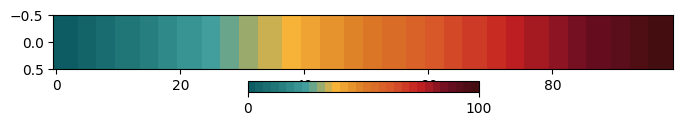

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Définir les couleurs de la palette en RGB
colors = [ "#0D5C63","#247B7B","#44a1a0ff",    "#F7B538", "#DB7C26",  "#D8572A","#C42021", "#6C0E23", "#440D0F"]

# Définir les positions normalisées pour chaque couleur
positions = [0.0, 0.5, 1.0]

# Créer la colormap
cmap = LinearSegmentedColormap.from_list('my_gradient', colors, N=30)

# Créer une figure pour visualiser la colormap
fig, ax = plt.subplots(figsize=(8, 1))
cax = ax.imshow(np.linspace(0, 100, 100).reshape(1, 100), cmap=cmap, aspect='auto', vmin=0, vmax=100)
fig.colorbar(cax, orientation='horizontal', ticks=[0, 100])

# Afficher la figure
plt.show()

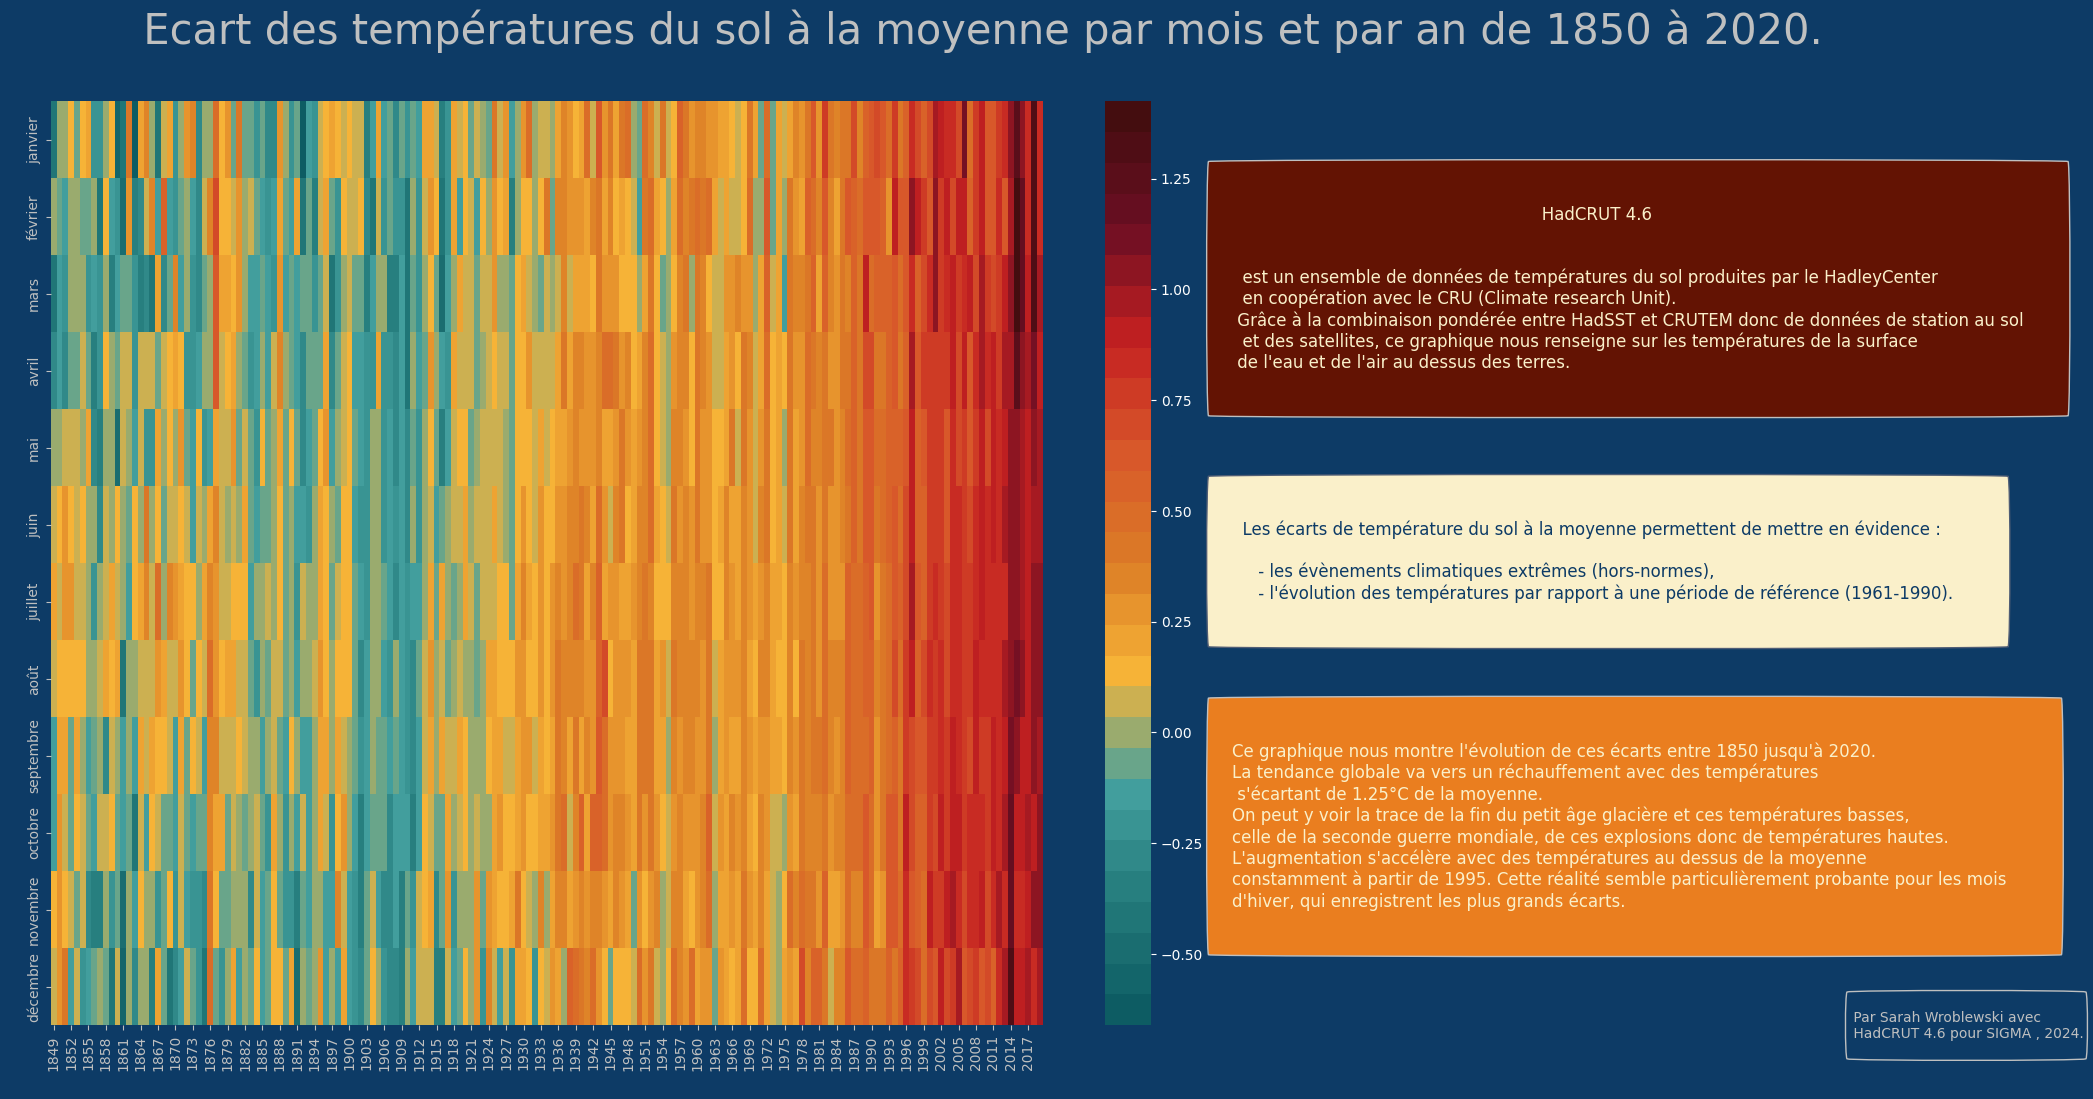

In [20]:
from matplotlib.font_manager import FontProperties
import seaborn as sns 

# Utiliser la fonction pivot pour réorganiser les données
heatmap_data = hadcrut.pivot_table(index='month',columns='year',  values='value')
heatmap_data.columns = annee
# Définir une liste pour les noms des ticks
custom_xticklabels = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"] 

# Créez la heatmap avec seaborn
fig = plt.figure(figsize=(16, 12))

plt.style.use('dark_background') # avoir les polices de la légende en blanc

# Création de la heatmap
ax1 =sns.heatmap(heatmap_data,  cmap=cmap, fmt='g', yticklabels=custom_xticklabels)
# Couleur du fond
fig.set_facecolor("#0D3B66")

plt.ylabel(' ', rotation = 45, color='#BFC0C0')
plt.xlabel(' ', rotation = 45, color='#BFC0C0')
ax1.tick_params(axis='x', colors='#BFC0C0')  # Couleur des étiquettes de l'axe x
ax1.tick_params(axis='y', colors='#BFC0C0')  # Couleur des étiquettes de l'axe y

# Ajouter tout le texte et les bbox colorées autour
t0 = ax1.text(310, 12.37, "\n Par Sarah Wroblewski avec \n HadCRUT 4.6 pour SIGMA , 2024.\n",color="#BFC0C0",fontsize=10)
t0.set_bbox(dict(facecolor='#0D3B66',  edgecolor='#BFC0C0',boxstyle='round4'))

t1 = ax1.text(200, 4, "\n\n                                                               HadCRUT 4.6 \
        \n\n\n      est un ensemble de données de températures du sol produites par le HadleyCenter \
        \n      en coopération avec le CRU (Climate research Unit).\
         \n     Grâce à la combinaison pondérée entre HadSST et CRUTEM donc de données de station au sol\
        \n      et des satellites, ce graphique nous renseigne sur les températures de la surface \
         \n     de l'eau et de l'air au dessus des terres.\n\n", size = 12, va="baseline", ha="left", multialignment="left", color='#FAF0CA')
t1.set_bbox(dict(facecolor='#631303',  edgecolor='#BFC0C0',boxstyle='round4'))


t2 = ax1.text(200, 7," \n\n      Les écarts de température du sol à la moyenne permettent de mettre en évidence :  \
         \n\n         - les évènements climatiques extrêmes (hors-normes), \
         \n         - l'évolution des températures par rapport à une période de référence (1961-1990). \
         \n\n     ", size=12,va="baseline", ha="left", multialignment="left", bbox=dict(fc="none"), color='#0D3B66')
t2.set_bbox(dict(facecolor='#FAF0CA',  edgecolor='#4F5D75',boxstyle='round4'))

t3 = ax1.text(200, 11, "\n\
          \n    Ce graphique nous montre l'évolution de ces écarts entre 1850 jusqu'à 2020. \
          \n    La tendance globale va vers un réchauffement avec des températures\
          \n     s'écartant de 1.25°C de la moyenne.\
         \n    On peut y voir la trace de la fin du petit âge glacière et ces températures basses,\
          \n    celle de la seconde guerre mondiale, de ces explosions donc de températures hautes.\
          \n    L'augmentation s'accélère avec des températures au dessus de la moyenne\
          \n    constamment à partir de 1995. Cette réalité semble particulièrement probante pour les mois\
          \n    d'hiver, qui enregistrent les plus grands écarts.\
          \n\n     "
              , size=12,
         va="baseline", ha="left", multialignment="left", color='#FAF0CA')
t3.set_bbox(dict(facecolor='#EA7E1F',  edgecolor='#BFC0C0',boxstyle='round4'))

# Ajoutez des titres et des labels
plt.title(' Ecart des températures du sol à la moyenne par mois et par an de 1850 à 2020.\
          \n', y = 1, x= 1,ha='center',fontsize=30, color='#BFC0C0')

# Affichez la heatmap
plt.show()

In [28]:
hadcrut

,year,month,value
0,1850,1,-0.386559
1,1850,2,0.027441
2,1850,3,-0.418559
3,1850,4,-0.249559
4,1850,5,-0.013559
...,...,...,...
2047,2021,8,1.024441
2048,2021,9,0.994441
2049,2021,10,1.042441
2050,2021,11,1.024441


In [10]:
hadcrut["value"].min()

-0.6605588235294118

In [26]:
hc_1850

,year,month,value
0,1850,1,-0.386559
1,1850,2,0.027441
2,1850,3,-0.418559
3,1850,4,-0.249559
4,1850,5,-0.013559
5,1850,6,0.100441
6,1850,7,0.188441
7,1850,8,0.076441
8,1850,9,-0.125559
9,1850,10,-0.137559


In [12]:


hc_1850=hadcrut[hadcrut["year"]==1850]
r=hc_1850["value"]+1
theta=np.linspace(0,2*np.pi,12)



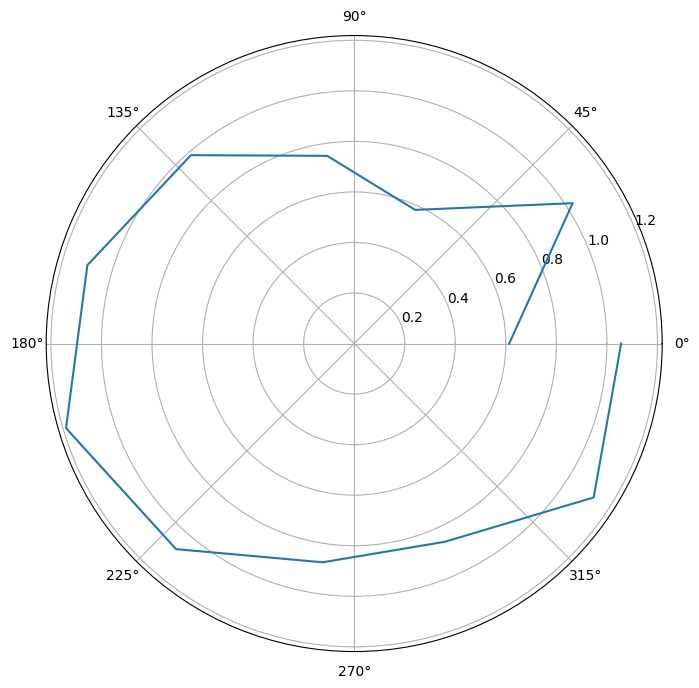

In [13]:


fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
plt.show()



In [18]:
r

0     0.613441
1     1.027441
2     0.581441
3     0.750441
4     0.986441
5     1.100441
6     1.188441
7     1.076441
8     0.874441
9     0.862441
10    1.126441
11    1.056441
Name: value, dtype: float64

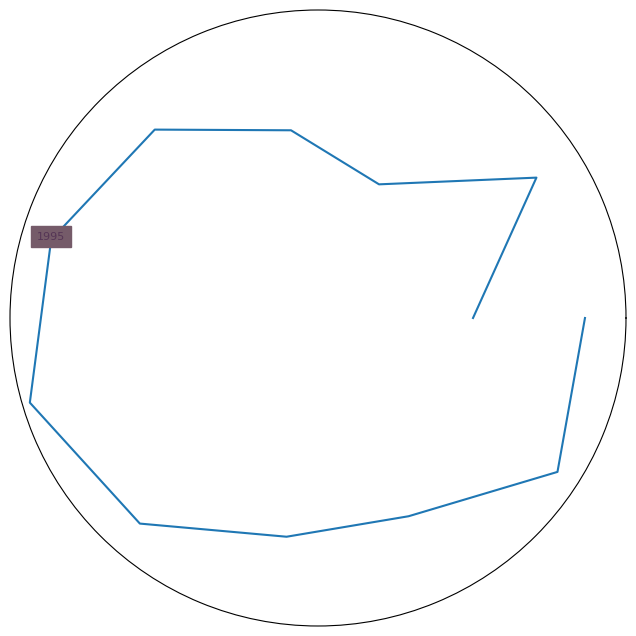

In [20]:


fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)

ax1.text(theta[5], r[5], "1995", color="#553555", ha='center', fontsize= 8,bbox=dict(facecolor='#755B69', edgecolor='#755B69'))

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()



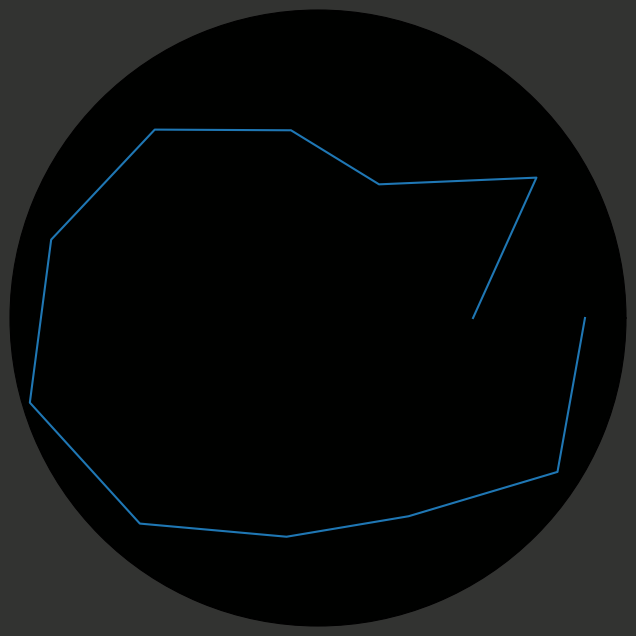

In [14]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

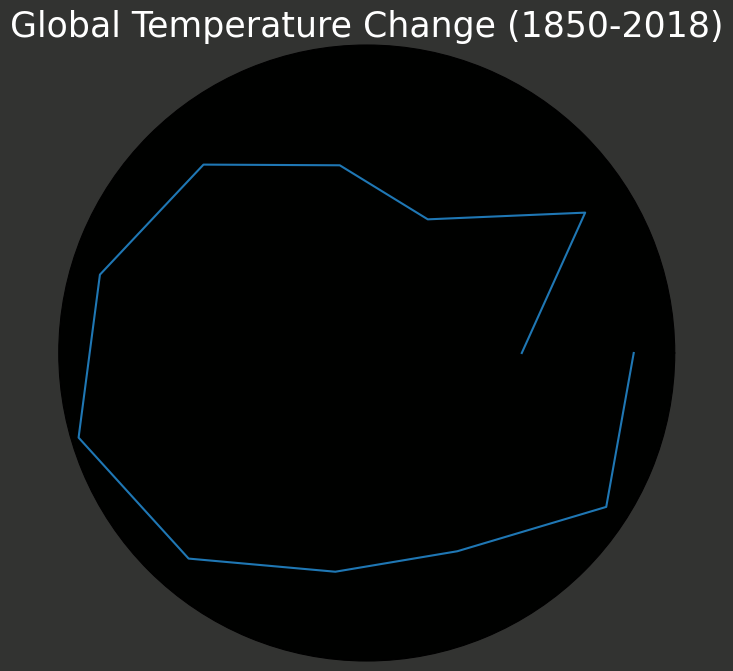

In [15]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
plt.show()

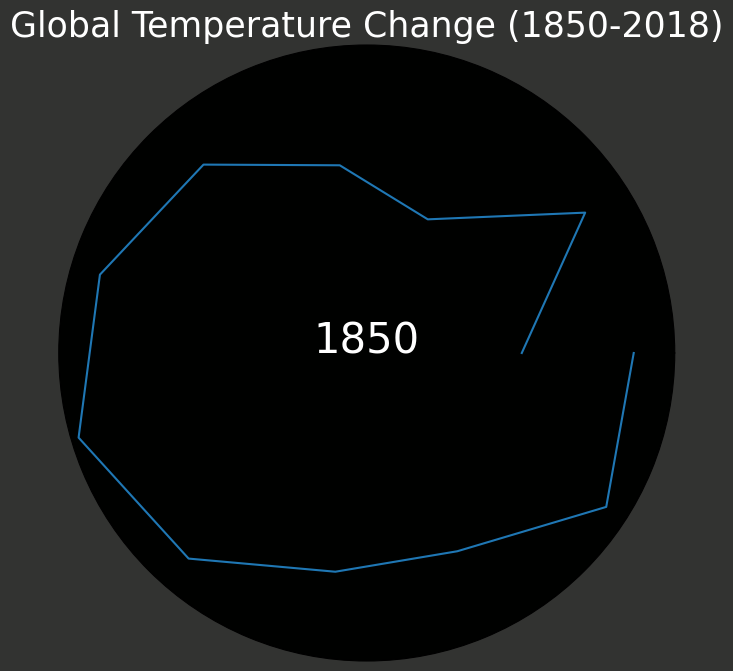

In [16]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")
ax1.plot(theta,r)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.text(0,0,"1850",color="white",size=30,ha="center")
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

In [17]:
hadcrut["value"].max()

1.4244411764705882

In [18]:
ax1.set_ylim(0,3.25)

(0.0, 3.25)

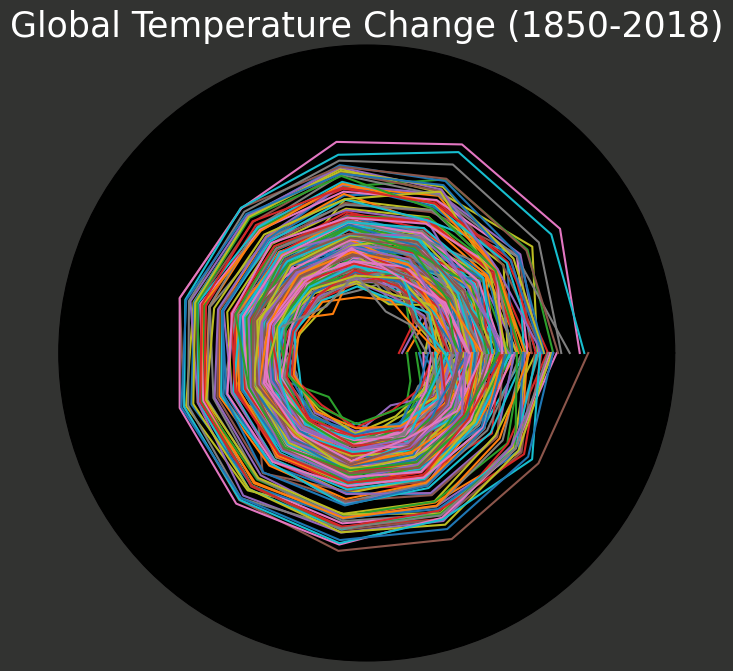

In [19]:


fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.set_xticks([])
ax1.set_yticks([])

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

for year in years:
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r)
plt.show()



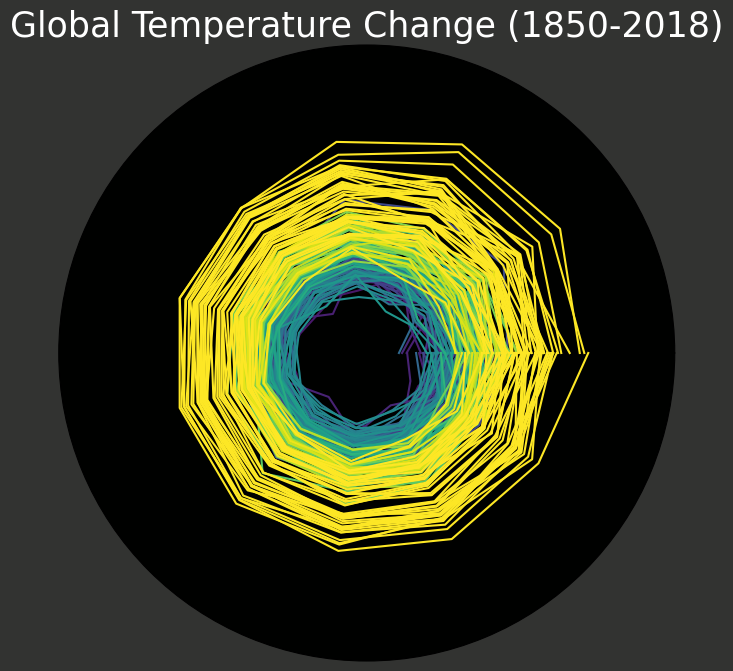

In [20]:


fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.set_xticks([])
ax1.set_yticks([])

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

for index,year in enumerate(years):
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r,c=plt.cm.viridis(index*2))
plt.show()



In [21]:
full_circle_thetas=np.linspace(0,2*np.pi,1000)
blue_one_radii=[0.0+1.0]*1000
red_one_radii=[1.5+1.0]*1000
red_two_radii=[2.0+1.0]*1000

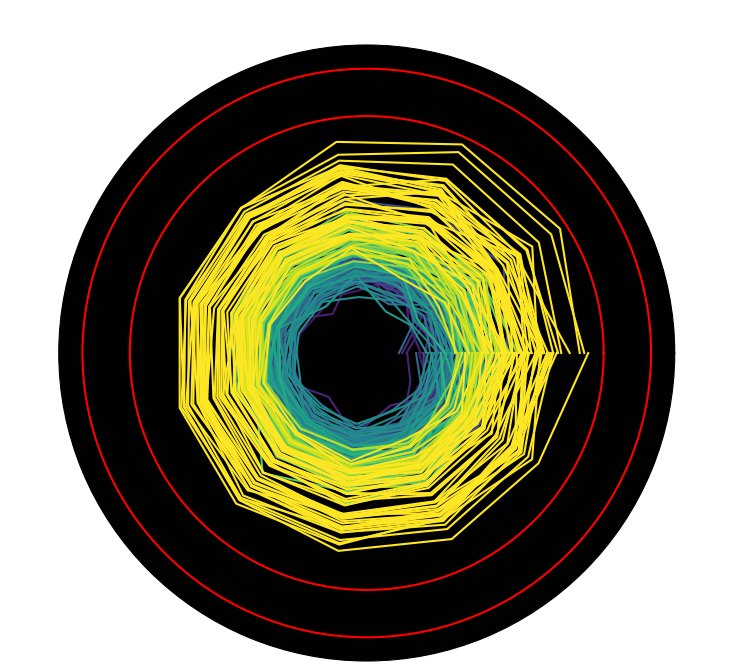

In [22]:
ig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.set_xticks([])
ax1.set_yticks([])

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

for index,year in enumerate(years):
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r,c=plt.cm.viridis(index*2))
plt.show()

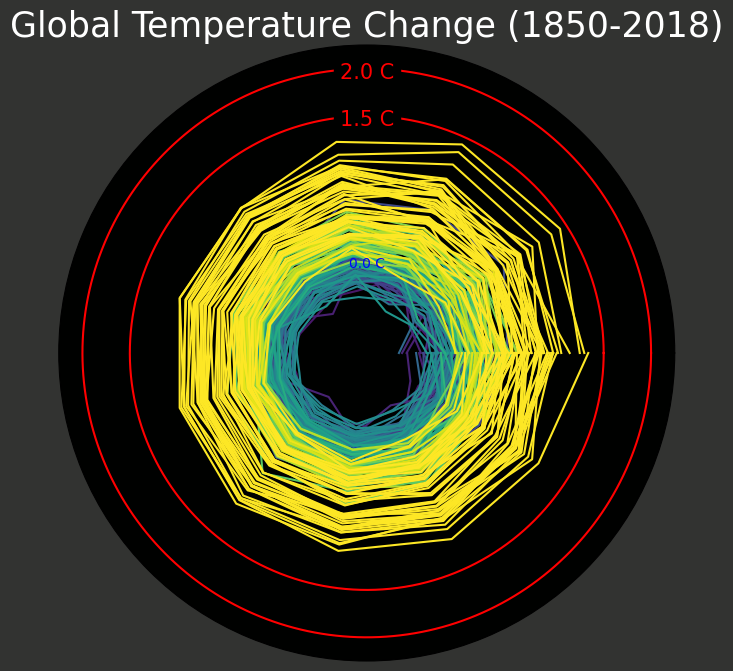

In [23]:
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=25)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.text(np.pi/2, 0.90, "0.0 C", color="blue", ha='center')
ax1.text(np.pi/2, 2.40, "1.5 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 2.90, "2.0 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

for index,year in enumerate(years):
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r,c=plt.cm.viridis(index*2))

plt.show()

In [13]:


months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig=plt.figure(figsize=(8,8))
ax1=plt.subplot(111,projection="polar")

ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")

ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-{})".format(hadcrut["year"].max()),color="white",fontsize=25,ha="center")
ax1.text(np.pi/2, 0.90, "0.0 C", color="blue", ha='center',fontsize= 15)
ax1.text(np.pi/2, 2.40, "1.5 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 2.90, "2.0 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

theta = np.linspace(0, 2*np.pi, 12)
years=hadcrut["year"].unique()

fig.text(0.78,0,"HadCRUT 4.6",color="white",fontsize=15)
fig.text(0.05,0.02,"Anis Ismail",color="white",fontsize=15)
fig.text(0.05,0,"Based on Ed Hawkins's 2017 Visualization",color="white",fontsize=10)

#add months ring
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i,month in enumerate(months):
  ax1.text(months_angles[i],3.4,month,color="white",fontsize=15,ha="center")

for index,year in enumerate(years):
  r=hadcrut.loc[hadcrut["year"]==year,"value"]+1
  ax1.plot(theta,r,c=plt.cm.viridis(index*2))

plt.tight_layout()
plt.show()



NameError: name 'plt' is not defined

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .html

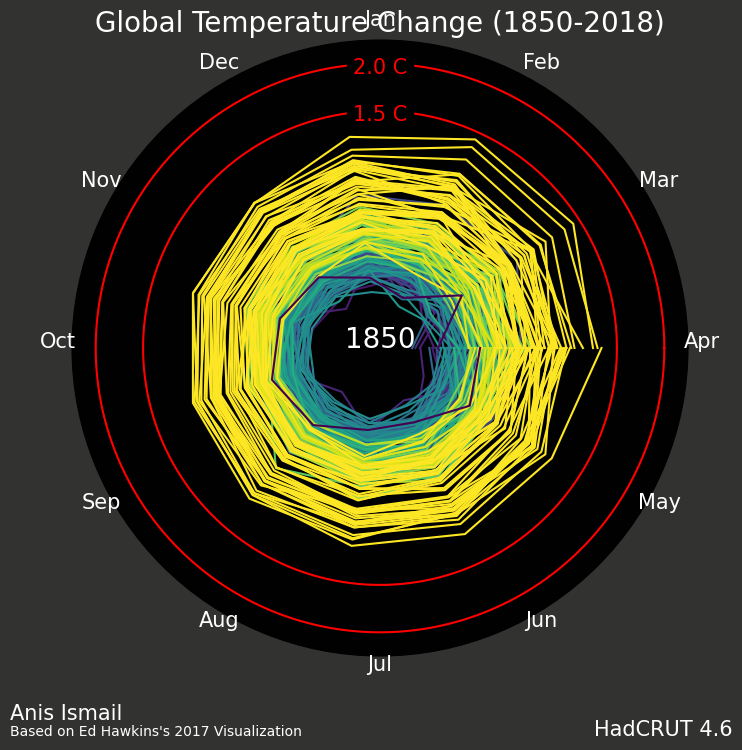

In [25]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim(0,3.25)
fig.set_facecolor("#323331")
ax1.set_facecolor("#000100")
ax1.set_title("Global Temperature Change (1850-2018)",color="white",fontsize=20)
ax1.set_xticks([])
ax1.set_yticks([])
#ax1.text(np.pi/2, 0.90, "0.0 C", color="blue", ha='center',fontsize= 15)
ax1.text(np.pi/2, 2.40, "1.5 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))
ax1.text(np.pi/2, 2.90, "2.0 C", color="red", ha='center', fontsize= 15,bbox=dict(facecolor='#000100', edgecolor='#000100'))

fig.text(0.78,0.01,"HadCRUT 4.6",color="white",fontsize=15)
fig.text(0.05,0.03,"Anis Ismail",color="white",fontsize=15)
fig.text(0.05,0.01,"Based on Ed Hawkins's 2017 Visualization",color="white",fontsize=10)

months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i,month in enumerate(months):
  ax1.text(months_angles[i],3.4,month,color="white",fontsize=15,ha="center")

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position()==(0,0)):
        txt.set_visible(False)
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
    ax1.plot(theta, r, c=plt.cm.viridis(i*2))
    ax1.text(0,0,year,fontsize=20,color="white",ha="center")
    return ax1

anim = FuncAnimation(fig, update, frames=len(years), interval=100)
#from matplotlib.animation import FFMpegWriter
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Program Files\\ffmpeg\\bin\\ffmpeg.exe'
#mywriter = FFMpegWriter()
anim.save('climate_spiral.html',savefig_kwargs={'facecolor': '#323331'})